<center>
<hr>
<h1>Python Crash Course</h1>
<h3>PhD Programme in Sociology and Social Research</h3> 
<h3>Michele Tizzoni</h3>
<h2>Notebook 2 - Data analysis with Pandas and visualization</h2>
<hr>
</center>

The aim of this second lesson is to:
 - guide you through most common steps in data cleaning and processing (with a df-centric approach)
 - show you how to conduct exploratory data analysis in Python 
 - cover essential visualization

# Pandas

**Pandas** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

https://pandas.pydata.org/

DataFrames are a 2-dimensional labeled data structures at the core of the Pandas library → the Excel spreadsheet alter-ego.



Basically a table with columns and rows: **the lifetime partner of our research struggles and joys**.


In [2]:
import pandas as pd

Let's create a dataframe. There are two ways of doing that. 

### Case 1 
**We create a dataframe from a dictionary.** This is useful in 0.0001\% of cases but it's a good starting point to learn some basics.

In [9]:
sample = {"course" : ['math', 'biology', 'cs'], "grade": [10, 8, 4]}

In [10]:
df = pd.DataFrame(sample)

In [11]:
df

,course,grade
0,math,10
1,biology,8
2,cs,4


In [12]:
df.dtypes

course    object
grade      int64
dtype: object

Let's add a new column

In [13]:
df['total students'] = [20, 21, 14]

In [14]:
df

,course,grade,total students
0,math,10,20
1,biology,8,21
2,cs,4,14


In [15]:
df.shape

(3, 3)

In [16]:
df.columns

Index(['course', 'grade', 'total students'], dtype='object')

In [17]:
df.to_numpy()

array([['math', 10, 20],
       ['biology', 8, 21],
       ['cs', 4, 14]], dtype=object)

In [18]:
df.loc[1]

course            biology
grade                   8
total students         21
Name: 1, dtype: object

In [19]:
df.loc[1,'course']

'biology'

In [20]:
df.loc[:2]

,course,grade,total students
0,math,10,20
1,biology,8,21
2,cs,4,14


In [21]:
df.loc[:2,'grade']

0    10
1     8
2     4
Name: grade, dtype: int64

### Case 2: upload from file (the most common case)

### The social capital atlas

The dataset provides measures of Social Capital for counties, ZIP codes, high schools, and colleges in the United States based on data from Facebook. The Social Capital Atlas dataset is the result of a collaboration between Meta, Opportunity Insights, and researchers from Harvard, New York University, and Stanford.

We construct three measures of social capital:

- Connectedness - The extent to which people with different characteristics are friends with each other. This includes our main **economic connectedness** measure.

- Cohesiveness - The degree to which friendship networks are clustered into cliques and whether friendships tend to be supported by mutual friends. This includes our clustering and support ratio measures.

- Civic Engagement - Indices of trust or participation in civic organizations. This includes our volunteering rate measure.

A visualization of this data is available here: www.socialcapital.org

Research publications for the Social Capital Atlas dataset are available here:

- [Social Capital I: Measurement and Associations with Economic Mobility](https://www.nature.com/articles/s41586-022-04996-4)

- [Social Capital II: Determinants of Economic Connectedness](https://www.nature.com/articles/s41586-022-04997-3)




We focus on the data collected at **county level**.

In [22]:
df_capital = pd.read_csv('./social_capital_county.csv')

In [23]:
df_capital.head()

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724


In [24]:
df_capital.columns

Index(['county', 'county_name', 'num_below_p50', 'pop2018', 'ec_county',
       'ec_se_county', 'child_ec_county', 'child_ec_se_county',
       'ec_grp_mem_county', 'ec_high_county', 'ec_high_se_county',
       'child_high_ec_county', 'child_high_ec_se_county',
       'ec_grp_mem_high_county', 'exposure_grp_mem_county',
       'exposure_grp_mem_high_county', 'child_exposure_county',
       'child_high_exposure_county', 'bias_grp_mem_county',
       'bias_grp_mem_high_county', 'child_bias_county',
       'child_high_bias_county', 'clustering_county', 'support_ratio_county',
       'volunteering_rate_county', 'civic_organizations_county'],
      dtype='object')

In [25]:
df_capital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county                        3089 non-null   int64  
 1   county_name                   3089 non-null   object 
 2   num_below_p50                 3087 non-null   float64
 3   pop2018                       2983 non-null   float64
 4   ec_county                     3018 non-null   float64
 5   ec_se_county                  3018 non-null   float64
 6   child_ec_county               2729 non-null   float64
 7   child_ec_se_county            2729 non-null   float64
 8   ec_grp_mem_county             3012 non-null   float64
 9   ec_high_county                3018 non-null   float64
 10  ec_high_se_county             3018 non-null   float64
 11  child_high_ec_county          2729 non-null   float64
 12  child_high_ec_se_county       2729 non-null   float64
 13  ec_

In [26]:
df_capital.describe()

,county,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,ec_high_se_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
count,3089.000000,3.087000e+03,2.983000e+03,3018.000000,3018.000000,2729.000000,2729.000000,3012.000000,3018.000000,3018.000000,...,2729.000000,2729.000000,3012.000000,3012.000000,2729.000000,2729.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,30218.783101,1.059956e+04,1.080104e+05,0.814464,0.013409,0.825335,0.032464,0.850302,1.252636,0.014754,...,0.827984,0.885009,0.064161,-0.187968,0.001222,-0.085386,0.116456,0.988901,0.078068,0.019762
std,15138.796297,4.164424e+04,3.377826e+05,0.177126,0.006176,0.221210,0.013225,0.213428,0.176560,0.006231,...,0.226322,0.248020,0.050633,0.064644,0.033337,0.048938,0.020364,0.015467,0.034841,0.009850
min,1001.000000,5.230174e+01,5.440000e+02,0.294690,0.004360,0.221880,0.011990,0.187420,0.700620,0.004750,...,0.216910,0.217280,-0.108090,-0.536180,-0.144020,-0.370950,0.071620,0.696760,0.009650,0.003490
25%,18161.000000,1.626969e+03,1.263000e+04,0.695607,0.009142,0.678750,0.022390,0.708260,1.134863,0.010060,...,0.673550,0.715310,0.030808,-0.221698,-0.018260,-0.111190,0.102690,0.986830,0.055280,0.014020
50%,29135.000000,3.353481e+03,2.788700e+04,0.806830,0.011900,0.815510,0.029900,0.840455,1.258200,0.013495,...,0.816630,0.868680,0.063970,-0.179075,0.001960,-0.079100,0.114570,0.993740,0.073280,0.017780
75%,45049.000000,7.326979e+03,7.272850e+04,0.936783,0.015800,0.962130,0.039900,0.996458,1.384345,0.017788,...,0.964820,1.040880,0.095450,-0.143335,0.019880,-0.052200,0.127240,0.996720,0.093960,0.023060
max,56045.000000,1.576718e+06,1.009805e+07,1.359700,0.050230,1.611360,0.091120,1.475880,1.715070,0.050990,...,1.634340,1.655150,0.334570,-0.043250,0.162700,0.069830,0.260970,1.000000,0.308736,0.195429


In [27]:
df_capital.set_index(['county'], inplace=True)

In [28]:
df_capital.head()

,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,ec_high_se_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
county,,,,,,,,,,,,,,,,,,,,,
1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,0.01019,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,0.00757,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,0.02199,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,0.01476,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,0.01163,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724


In [29]:
df_capital.reset_index(drop=False, inplace=True)

In [30]:
df_capital.head()

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724


In [31]:
df_capital.ec_county

0       0.72077
1       0.74313
2       0.41366
3       0.63152
4       0.72562
         ...   
3084    0.96235
3085    1.07623
3086    0.95452
3087    0.90667
3088    0.97840
Name: ec_county, Length: 3089, dtype: float64

In [32]:
df_capital.ec_county.describe()

count    3018.000000
mean        0.814464
std         0.177126
min         0.294690
25%         0.695607
50%         0.806830
75%         0.936783
max         1.359700
Name: ec_county, dtype: float64

In [33]:
df_capital['ec_county'].describe()

count    3018.000000
mean        0.814464
std         0.177126
min         0.294690
25%         0.695607
50%         0.806830
75%         0.936783
max         1.359700
Name: ec_county, dtype: float64

In [34]:
df_capital['ec_county'].max(), df_capital['ec_county'].min()

(1.3597, 0.29469001)

In [35]:
df_capital['ec_county'].mean()

0.8144641210868125

We can add a new column based on operations with the existing columns.

In [36]:
df_capital['perc_pop'] = df_capital['pop2018']*100/df_capital.pop2018.sum()

In [37]:
df_capital.perc_pop.sum()

99.99999999999999

## State based analysis

We would like to add a new column that identifies the State. We can get each state name from the name of the county, which is a string.

In [38]:
df_capital[['county','state']] = df_capital['county_name'].str.split(', ', expand=True)

In [39]:
df_capital.drop('county_name', axis=1, inplace=True)

In [40]:
df_capital

,county,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,ec_high_se_county,...,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county,perc_pop,state
0,Autauga,5922.39210,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,0.01019,...,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518,0.017132,Alabama
1,Baldwin,15458.39600,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,0.00757,...,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526,0.064590,Alabama
2,Barbour,4863.97360,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,0.02199,...,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474,0.008002,Alabama
3,Bibb,3061.49340,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,0.01476,...,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439,0.006992,Alabama
4,Blount,6740.91160,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,0.01163,...,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724,0.017891,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,Sweetwater,2402.96900,44117.0,0.96235,0.01280,1.14781,0.02794,1.13449,1.32399,0.01177,...,0.09519,-0.12030,-0.02333,-0.08683,0.10809,0.99710,0.07321,0.01225,0.013693,Wyoming
3085,Teton,783.24982,23059.0,1.07623,0.01744,1.23113,0.04692,1.13296,1.63551,0.00848,...,0.14337,-0.11958,0.07346,-0.07364,0.09253,0.98648,0.09747,0.03223,0.007157,Wyoming
3086,Uinta,2174.06180,20609.0,0.95452,0.01404,1.04595,0.03455,0.92831,1.32040,0.01351,...,0.13816,-0.12194,0.00808,-0.06074,0.11204,0.99479,0.06942,0.01222,0.006396,Wyoming
3087,Washakie,872.51544,8129.0,0.90667,0.01928,0.90794,0.04962,0.78223,1.29208,0.02298,...,0.06667,-0.20435,-0.02615,-0.06076,0.11592,0.99708,0.05843,0.03512,0.002523,Wyoming


In [41]:
df_capital.groupby(['state'])['ec_county'].mean()

state
Alabama                 0.595470
Alaska                  0.988170
Arizona                 0.691928
Arkansas                0.689512
California              0.807316
Colorado                0.951726
Connecticut             0.948693
Delaware                0.781613
District of Columbia    0.996160
Florida                 0.664965
Georgia                 0.607236
Hawaii                  1.041255
Idaho                   0.852070
Illinois                0.840682
Indiana                 0.823437
Iowa                    0.984454
Kansas                  0.940320
Kentucky                0.825159
Louisiana               0.699572
Maine                   0.841684
Maryland                0.948747
Massachusetts           0.928555
Michigan                0.803008
Minnesota               1.047906
Mississippi             0.634397
Missouri                0.845587
Montana                 0.895603
Nebraska                0.988439
Nevada                  0.838435
New Hampshire           1.087421
New 

In [42]:
df_med_state = df_capital.groupby(['state'])['ec_county'].median()

In [43]:
df_med_state = df_med_state.to_frame()

In [44]:
df_med_state

,ec_county
state,
Alabama,0.599175
Alaska,1.040115
Arizona,0.715720
Arkansas,0.704260
California,0.800080
Colorado,0.937605
Connecticut,0.972300
Delaware,0.792910
District of Columbia,0.996160


In [45]:
df_med_state.T

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
ec_county,0.599175,1.040115,0.71572,0.70426,0.80008,0.937605,0.9723,0.79291,0.99616,0.66801,...,1.01472,0.67552,0.77412,1.02299,0.956825,0.81584,0.84938,0.77017,0.961075,0.9745


In [46]:
df_med_state[df_med_state.ec_county > 1]

,ec_county
state,
Alaska,1.040115
Hawaii,1.075315
Minnesota,1.062540
Nebraska,1.020905
New Hampshire,1.083120
North Dakota,1.111155
Rhode Island,1.029000
South Dakota,1.014720
Utah,1.022990


In [47]:
df_med_state[df_med_state.ec_county < 0.7]

,ec_county
state,
Alabama,0.599175
Florida,0.668010
Georgia,0.577825
Louisiana,0.692090
Mississippi,0.647440
New Mexico,0.629110
North Carolina,0.628570
South Carolina,0.533780
Tennessee,0.675520


# Matplotlib and plotting

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

All aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

In [48]:
%matplotlib inline

In [49]:
import matplotlib.pyplot as plt

In [50]:
import numpy as np

Let's start with a very basic plot

In [51]:
x = np.linspace(0, 5, 10)
y = x ** 2

In [52]:
x

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

Text(0.5, 1.0, '$y = x^2$')

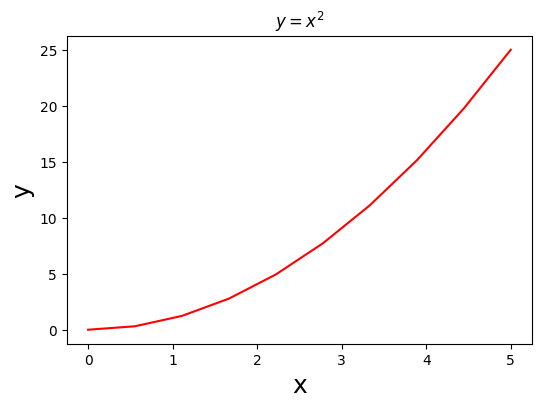

In [53]:
plt.figure(figsize=(6,4))

plt.plot(x, y, 'r')

plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)

plt.title('$y = x^2$')

Now, let's plot some interesting quantities of our dataset.

## Histograms

<Axes: >

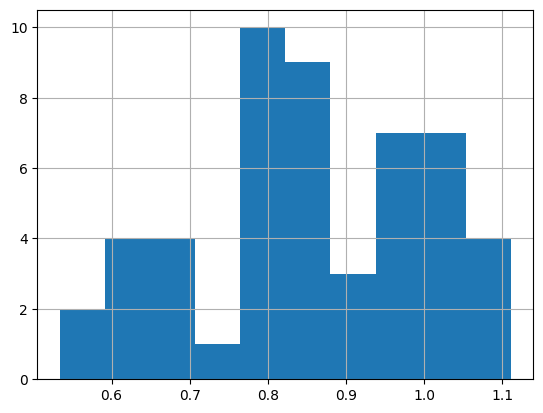

In [54]:
df_med_state.ec_county.hist()

This is quite rough... Let's make it look a bit better by considering the original dataframe

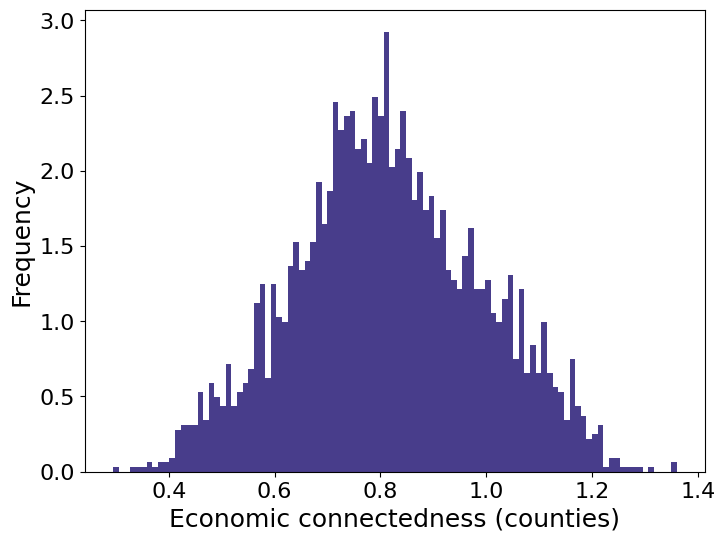

In [55]:
plt.figure(figsize=(8,6))

df_capital.ec_county.hist(bins=100, density=True, color='darkslateblue')

plt.xlabel('Economic connectedness (counties)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)

## Scatterplots

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 [Text(0, -0.05, '−0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.10000000000000002, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25000000000000006, '0.25'),
  Text(0, 0.30000000000000004, '0.30')])

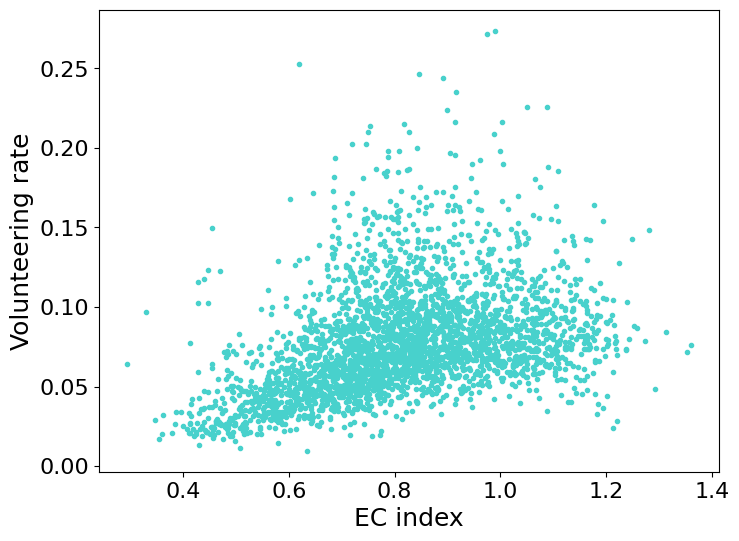

In [56]:
plt.figure(figsize=(8,6))
plt.plot( df_capital['ec_county'], df_capital['volunteering_rate_county'], 'o', markersize=3, color='mediumturquoise')

plt.xlabel('EC index', fontsize=18)
plt.ylabel('Volunteering rate', fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


In [60]:
np.correlate(df_capital['ec_county'], df_capital['volunteering_rate_county'])

array([nan])

# Multiple panels plots

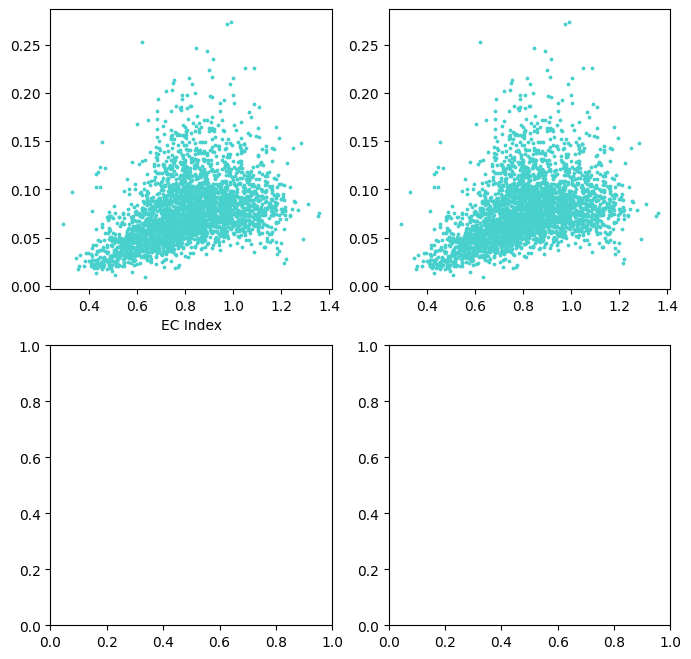

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax=ax.flatten() #we flatten the axis to a one-dimensional array

ax[0].scatter(df_capital['ec_county'], df_capital['volunteering_rate_county'], color='mediumturquoise', s=3)
ax[0].set_xlabel('EC Index')
ax[0].set_xlabel('Volunteering Rate')


ax[1].scatter(df_capital['ec_county'], df_capital[''], color='mediumturquoise', s=3)
ax[1].set_xlabel('EC Index')
ax[1].set_xlabel('Volunteering Rate')

ax[2].scatter(df_capital['ec_county'], df_capital[''], color='mediumturquoise', s=3)
ax[2].set_xlabel('EC Index')
ax[2].set_xlabel('Volunteering Rate')

ax[3].scatter(df_capital['ec_county'], df_capital[''], color='mediumturquoise', s=3)
ax[3].set_xlabel('EC Index')
ax[3].set_xlabel('Volunteering Rate')


# Seaborn 

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

https://seaborn.pydata.org/

In [164]:
import seaborn as sns

<Axes: xlabel='ec_county', ylabel='state'>

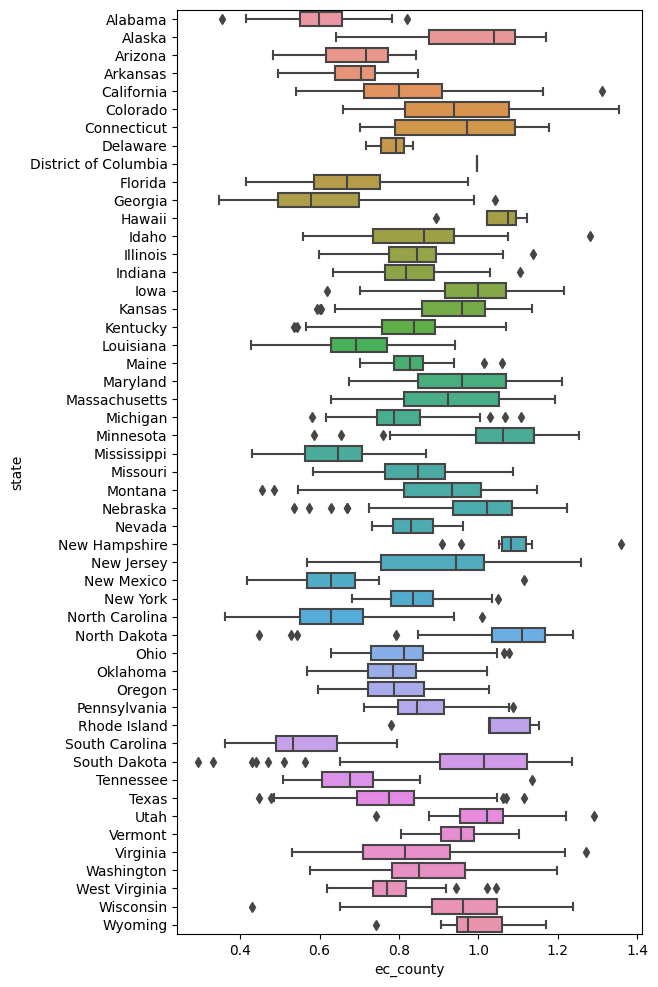

In [168]:
plt.figure(figsize=(6,12))

sns.boxplot(data=df_capital, x="ec_county", y="state")


<Axes: xlabel='ec_county', ylabel='state'>

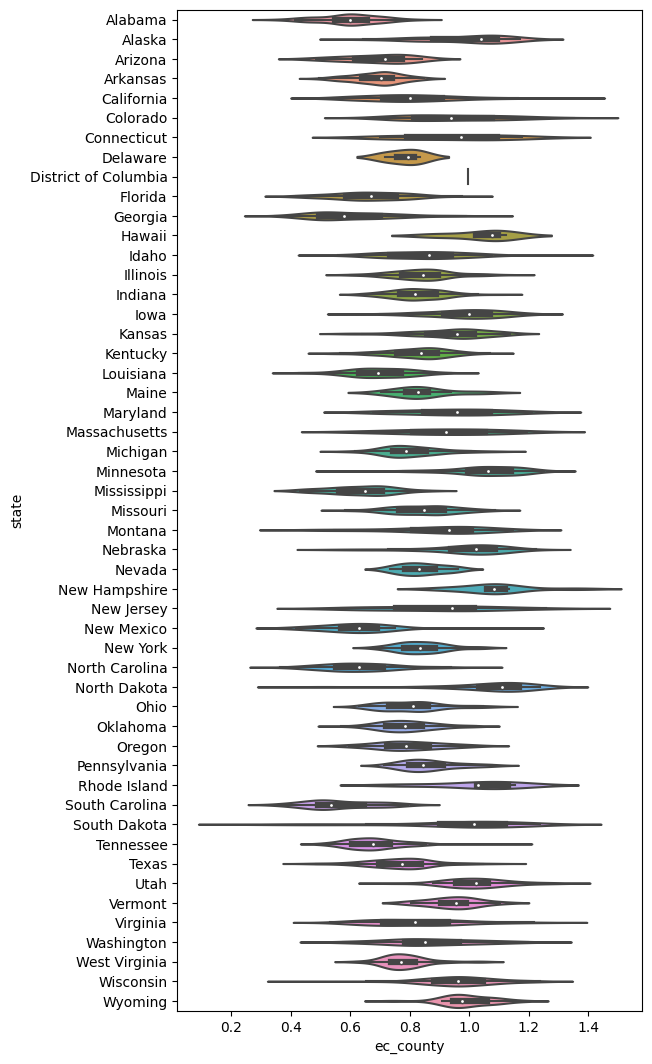

In [194]:
plt.figure(figsize=(6,13))


sns.violinplot(data=df_capital, x="ec_county", y="state")
